In [47]:
#IMPORTING LIABRARIES

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
#CODE FOR DIABETES DATASET

In [50]:
#LOADING THE DATASET

In [51]:
diabetes_df = pd.read_csv('/content/diabetes.csv')
diabetes_df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [52]:
#CLEANING THE DATASET

In [53]:
def clean_dataset(df):
    df = df.dropna()
    if df.isnull().sum().sum() > 0:
        df = df.fillna(df.mean())
    return df
diabetes_df = clean_dataset(diabetes_df)
diabetes_df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [54]:
#PERFORMING EDA

In [55]:
def perform_eda(df, dataset_name):
    print(f"EDA for {dataset_name} dataset")
    print("-" * 40)
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())
    print("Missing Values:\n", df.isnull().sum())
    print("Summary Statistics:\n", df.describe())
    print("Class Distribution (if classification target exists):")
    if 'Outcome' in df.columns:
        print(df['Outcome'].value_counts())
    elif 'target' in df.columns:
        print(df['target'].value_counts())
    elif 'status' in df.columns:
        print(df['status'].value_counts())
    print("\n")

perform_eda(diabetes_df, "Diabetes")


EDA for Diabetes dataset
----------------------------------------
Shape: (768, 9)
Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Summary Statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%    

EDA for Diabetes dataset
----------------------------------------
Shape: (768, 9)
Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Summary Statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%    

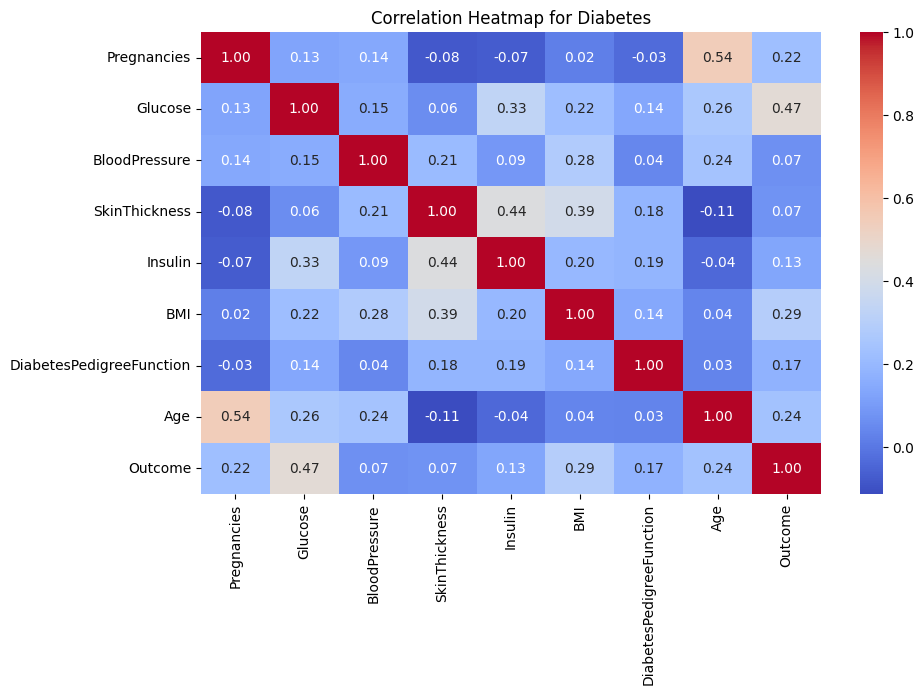

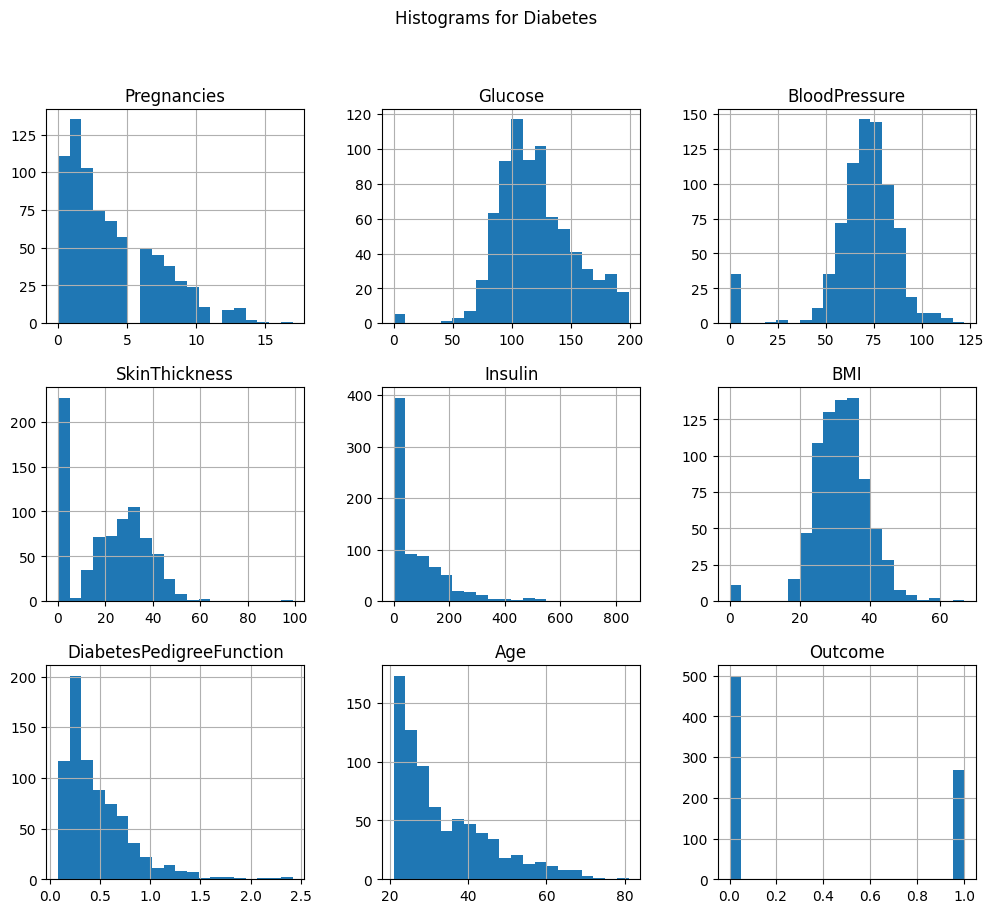

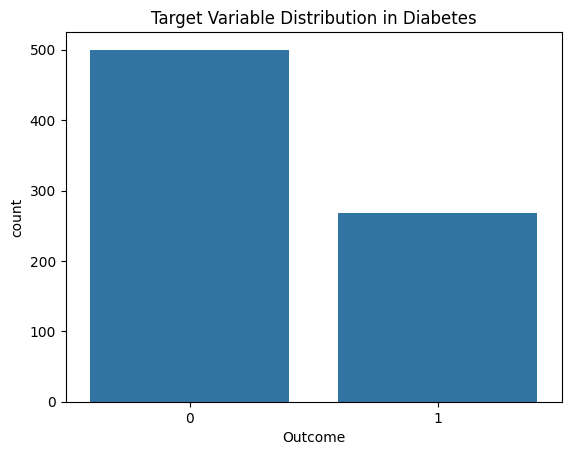

In [56]:
def perform_eda(df, dataset_name):
    print(f"EDA for {dataset_name} dataset")
    print("-" * 40)
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())
    print("Missing Values:\n", df.isnull().sum())
    print("Summary Statistics:\n", df.describe(include='all'))
    print("Class Distribution (if classification target exists):")
    if 'Outcome' in df.columns:
        print(df['Outcome'].value_counts())
    elif 'target' in df.columns:
        print(df['target'].value_counts())
    elif 'status' in df.columns:
        print(df['status'].value_counts())
    print("\n")

    # Generate graphs
    numeric_columns = df.select_dtypes(include=['float64', 'int64'])
    if not numeric_columns.empty:
        plt.figure(figsize=(10, 6))
        sns.heatmap(numeric_columns.corr(), annot=True, fmt=".2f", cmap="coolwarm")
        plt.title(f"Correlation Heatmap for {dataset_name}")
        plt.show()

        numeric_columns.hist(figsize=(12, 10), bins=20)
        plt.suptitle(f"Histograms for {dataset_name}")
        plt.show()

    if 'Outcome' in df.columns or 'target' in df.columns or 'status' in df.columns:
        target_column = 'Outcome' if 'Outcome' in df.columns else 'target' if 'target' in df.columns else 'status'
        sns.countplot(x=target_column, data=df)
        plt.title(f"Target Variable Distribution in {dataset_name}")
        plt.show()

perform_eda(diabetes_df, "Diabetes")

In [57]:
#CODE FOR HEART DATASET

In [58]:
#LOADING THE DATASET

In [59]:
heart_df = pd.read_csv('/content/heart.csv')
heart_df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [60]:
#CLEANING THE DATASET

In [61]:
heart_df = clean_dataset(heart_df)
heart_df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [62]:
#PERFORMING EDA

In [63]:
def perform_eda(df, dataset_name):
    print(f"EDA for {dataset_name} dataset")
    print("-" * 40)
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())
    print("Missing Values:\n", df.isnull().sum())
    print("Summary Statistics:\n", df.describe())
    print("Class Distribution (if classification target exists):")
    if 'Outcome' in df.columns:
        print(df['Outcome'].value_counts())
    elif 'target' in df.columns:
        print(df['target'].value_counts())
    elif 'status' in df.columns:
        print(df['status'].value_counts())
    print("\n")
perform_eda(heart_df, "Heart Disease")

EDA for Heart Disease dataset
----------------------------------------
Shape: (303, 14)
Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Summary Statistics:
               age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.

EDA for Heart Disease dataset
----------------------------------------
Shape: (303, 14)
Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Summary Statistics:
               age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.

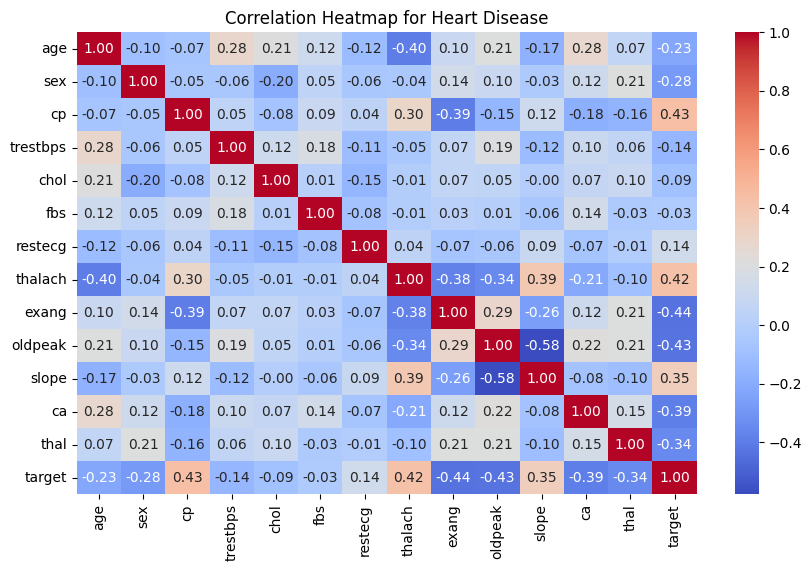

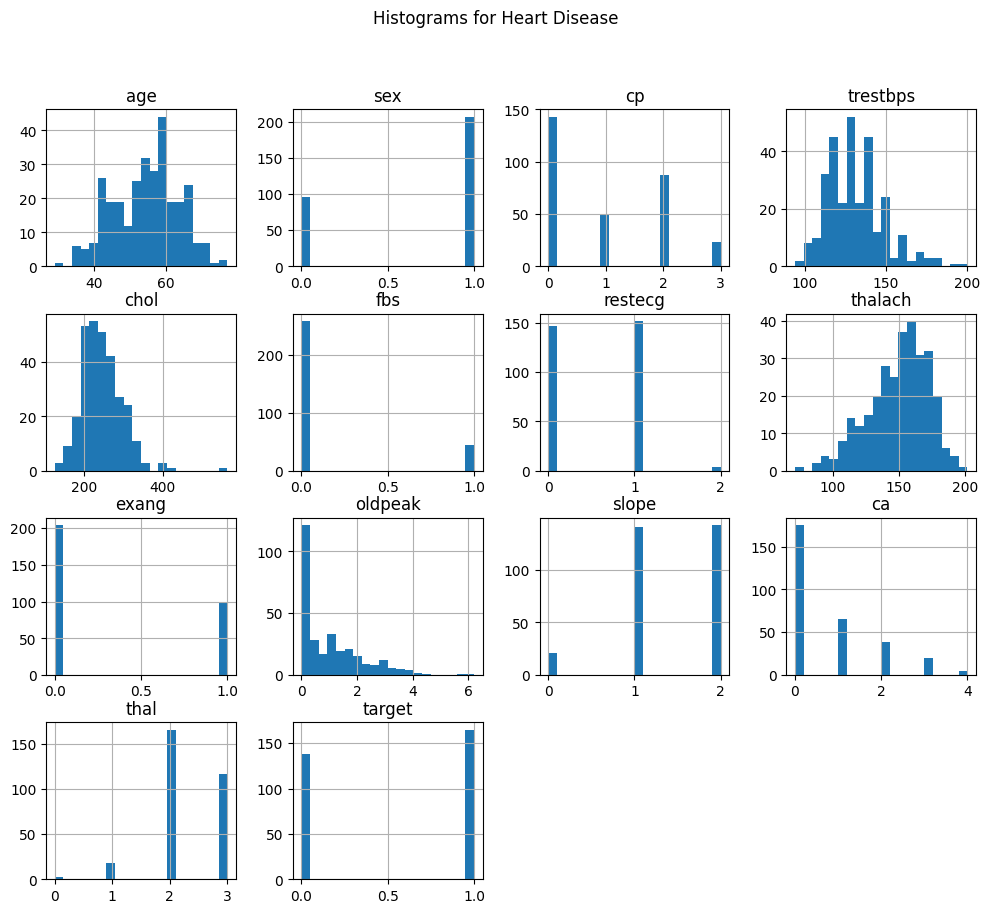

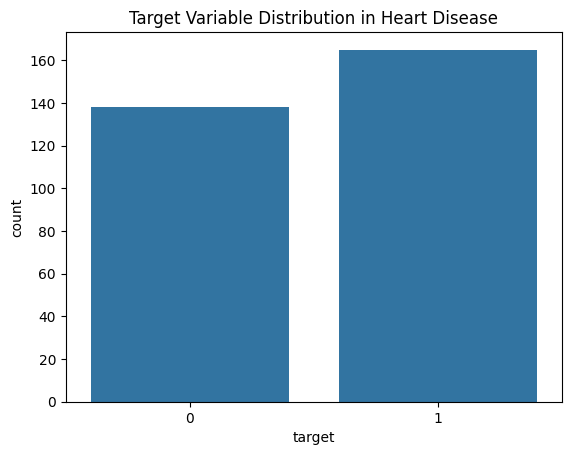

In [64]:
def perform_eda(df, dataset_name):
    print(f"EDA for {dataset_name} dataset")
    print("-" * 40)
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())
    print("Missing Values:\n", df.isnull().sum())
    print("Summary Statistics:\n", df.describe(include='all'))
    print("Class Distribution (if classification target exists):")
    if 'Outcome' in df.columns:
        print(df['Outcome'].value_counts())
    elif 'target' in df.columns:
        print(df['target'].value_counts())
    elif 'status' in df.columns:
        print(df['status'].value_counts())
    print("\n")

    # Generate graphs
    numeric_columns = df.select_dtypes(include=['float64', 'int64'])
    if not numeric_columns.empty:
        plt.figure(figsize=(10, 6))
        sns.heatmap(numeric_columns.corr(), annot=True, fmt=".2f", cmap="coolwarm")
        plt.title(f"Correlation Heatmap for {dataset_name}")
        plt.show()

        numeric_columns.hist(figsize=(12, 10), bins=20)
        plt.suptitle(f"Histograms for {dataset_name}")
        plt.show()

    if 'Outcome' in df.columns or 'target' in df.columns or 'status' in df.columns:
        target_column = 'Outcome' if 'Outcome' in df.columns else 'target' if 'target' in df.columns else 'status'
        sns.countplot(x=target_column, data=df)
        plt.title(f"Target Variable Distribution in {dataset_name}")
        plt.show()
perform_eda(heart_df, "Heart Disease")

In [65]:
#CODE FOR PAKINSONS DATASET

In [66]:
#LOADING THE PARKISONS DATASET

In [67]:
parkinsons_df = pd.read_csv('/content/parkinsons.csv')
parkinsons_df

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0             0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1             0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2             0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3             0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4             0.00011   0.00655   0.00908     0.01966       0.06425  ...   
..                ...       ...       ...         ...           ...  ...   
190           0.00003   0.00263   0.00259     0.00790       0.04087  ...   
191           0.00003   0.00331   0.00292     0.00994       0.02751  ...   
192           0.00008   0.00624   0.00564     0.01873       0.02308  ...   
193           0.00004   0.00370   0.00390     0.01109       0.02296  ...   
194           0.00003   0.00295   0.00317     0.00885       0.01884  ...   

     Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0        0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1        0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2        0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3        0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4        0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   
..           ...      ...     ...     ...       ...       ...       ...   
190      0.07008  0.02764  19.517       0  0.448439  0.657899 -6.538586   
191      0.04812  0.01810  19.147       0  0.431674  0.683244 -6.195325   
192      0.03804  0.10715  17.883       0  0.407567  0.655683 -6.787197   
193      0.03794  0.07223  19.020       0  0.451221  0.643956 -6.744577   
194      0.03078  0.04398  21.209       0  0.462803  0.664357 -5.724056   

      spread2        D2       PPE  
0    0.266482  2.301442  0.284654  
1    0.335590  2.486855  0.368674  
2    0.311173  2.342259  0.332634  
3    0.334147  2.405554  0.368975  
4    0.234513  2.332180  0.410335  
..        ...       ...       ...  
190  0.121952  2.657476  0.133050  
191  0.129303  2.784312  0.168895  
192  0.158453  2.679772  0.131728  
193  0.207454  2.138608  0.123306  
194  0.190667  2.555477  0.148569  

[195 rows x 24 columns]

In [68]:
#CLEANING THE DATASET

In [69]:
parkinsons_df = clean_dataset(parkinsons_df)
parkinsons_df

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0             0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1             0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2             0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3             0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4             0.00011   0.00655   0.00908     0.01966       0.06425  ...   
..                ...       ...       ...         ...           ...  ...   
190           0.00003   0.00263   0.00259     0.00790       0.04087  ...   
191           0.00003   0.00331   0.00292     0.00994       0.02751  ...   
192           0.00008   0.00624   0.00564     0.01873       0.02308  ...   
193           0.00004   0.00370   0.00390     0.01109       0.02296  ...   
194           0.00003   0.00295   0.00317     0.00885       0.01884  ...   

     Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0        0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1        0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2        0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3        0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4        0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   
..           ...      ...     ...     ...       ...       ...       ...   
190      0.07008  0.02764  19.517       0  0.448439  0.657899 -6.538586   
191      0.04812  0.01810  19.147       0  0.431674  0.683244 -6.195325   
192      0.03804  0.10715  17.883       0  0.407567  0.655683 -6.787197   
193      0.03794  0.07223  19.020       0  0.451221  0.643956 -6.744577   
194      0.03078  0.04398  21.209       0  0.462803  0.664357 -5.724056   

      spread2        D2       PPE  
0    0.266482  2.301442  0.284654  
1    0.335590  2.486855  0.368674  
2    0.311173  2.342259  0.332634  
3    0.334147  2.405554  0.368975  
4    0.234513  2.332180  0.410335  
..        ...       ...       ...  
190  0.121952  2.657476  0.133050  
191  0.129303  2.784312  0.168895  
192  0.158453  2.679772  0.131728  
193  0.207454  2.138608  0.123306  
194  0.190667  2.555477  0.148569  

[195 rows x 24 columns]

In [70]:
#PERFORMING EDA

In [71]:
def perform_eda(df, dataset_name):
    print(f"EDA for {dataset_name} dataset")
    print("-" * 40)
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())
    print("Missing Values:\n", df.isnull().sum())
    print("Summary Statistics:\n", df.describe())
    print("Class Distribution (if classification target exists):")
    if 'Outcome' in df.columns:
        print(df['Outcome'].value_counts())
    elif 'target' in df.columns:
        print(df['target'].value_counts())
    elif 'status' in df.columns:
        print(df['status'].value_counts())
    print("\n")

perform_eda(parkinsons_df, "Parkinson's")

EDA for Parkinson's dataset
----------------------------------------
Shape: (195, 24)
Columns: ['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']
Missing Values:
 name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64
Summary Statistics:
        MDVP:Fo(Hz)  MDVP:

EDA for Parkinson's dataset
----------------------------------------
Shape: (195, 24)
Columns: ['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']
Missing Values:
 name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64
Summary Statistics:
                   name  M

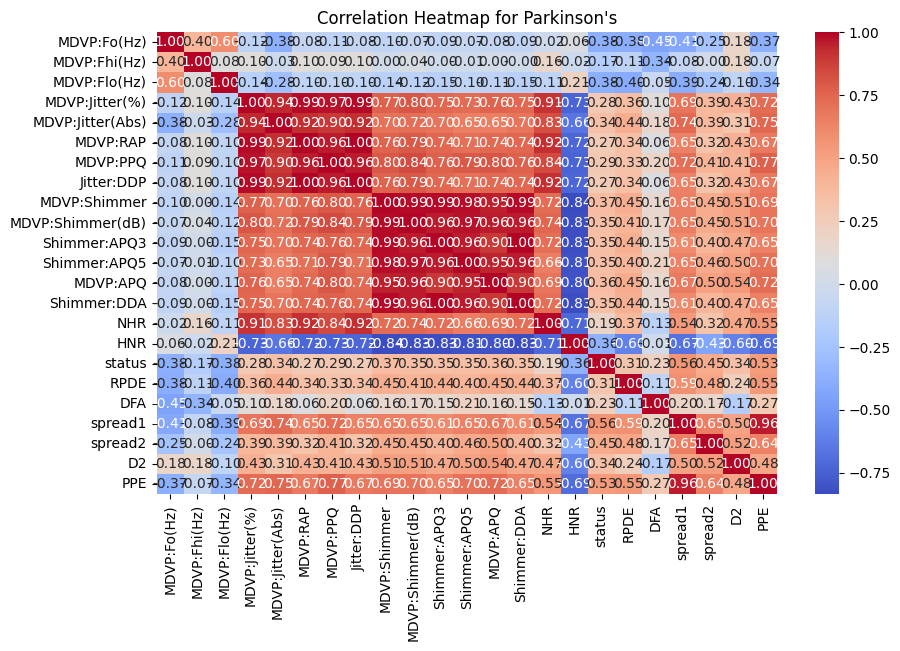

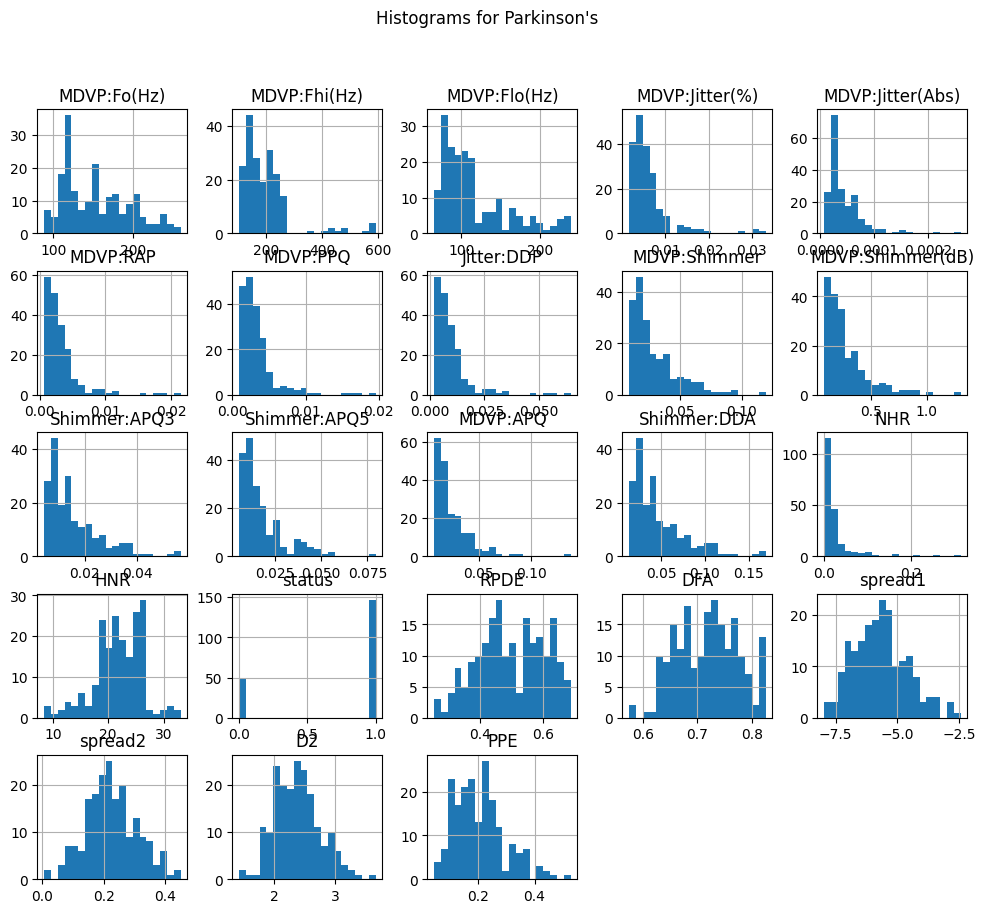

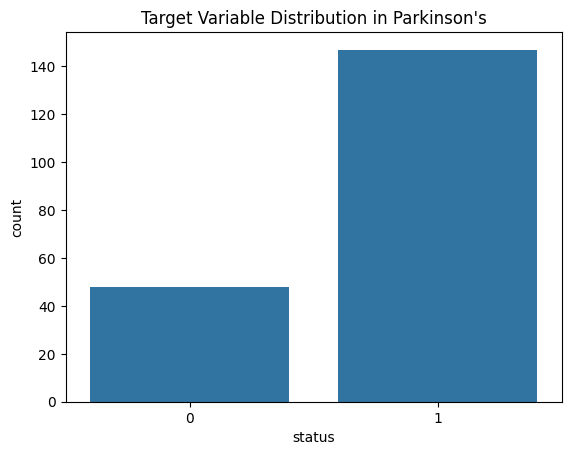

In [72]:
# Perform EDA

def perform_eda(df, dataset_name):
    print(f"EDA for {dataset_name} dataset")
    print("-" * 40)
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())
    print("Missing Values:\n", df.isnull().sum())
    print("Summary Statistics:\n", df.describe(include='all'))
    print("Class Distribution (if classification target exists):")
    if 'Outcome' in df.columns:
        print(df['Outcome'].value_counts())
    elif 'target' in df.columns:
        print(df['target'].value_counts())
    elif 'status' in df.columns:
        print(df['status'].value_counts())
    print("\n")

    # Generate graphs
    numeric_columns = df.select_dtypes(include=['float64', 'int64'])
    if not numeric_columns.empty:
        plt.figure(figsize=(10, 6))
        sns.heatmap(numeric_columns.corr(), annot=True, fmt=".2f", cmap="coolwarm")
        plt.title(f"Correlation Heatmap for {dataset_name}")
        plt.show()

        numeric_columns.hist(figsize=(12, 10), bins=20)
        plt.suptitle(f"Histograms for {dataset_name}")
        plt.show()

    if 'Outcome' in df.columns or 'target' in df.columns or 'status' in df.columns:
        target_column = 'Outcome' if 'Outcome' in df.columns else 'target' if 'target' in df.columns else 'status'
        sns.countplot(x=target_column, data=df)
        plt.title(f"Target Variable Distribution in {dataset_name}")
        plt.show()


perform_eda(parkinsons_df, "Parkinson's")

In [73]:
#SPLITTING,TRAINING,VALIDATION AND TESTING FOR THE THREE DATASETS

In [74]:
# Split datasets into training, validation, and test sets

def split_data(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column]
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [75]:
# Assuming the target columns are known
diabetes_splits = split_data(diabetes_df, 'Outcome')
heart_splits = split_data(heart_df, 'target')
parkinsons_splits = split_data(parkinsons_df, 'status')

In [76]:
# Print split shapes
for name, splits in zip(["Diabetes", "Heart Disease", "Parkinson's"],
                        [diabetes_splits, heart_splits, parkinsons_splits]):
    X_train, X_val, X_test, y_train, y_val, y_test = splits
    print(f"{name} dataset:")
    print("Train set:", X_train.shape, y_train.shape)
    print("Validation set:", X_val.shape, y_val.shape)
    print("Test set:", X_test.shape, y_test.shape)
    print()

Diabetes dataset:
Train set: (537, 8) (537,)
Validation set: (115, 8) (115,)
Test set: (116, 8) (116,)

Heart Disease dataset:
Train set: (212, 13) (212,)
Validation set: (45, 13) (45,)
Test set: (46, 13) (46,)

Parkinson's dataset:
Train set: (136, 23) (136,)
Validation set: (29, 23) (29,)
Test set: (30, 23) (30,)



In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [78]:
#TRAINING AN HEART DISESASE

In [79]:
data = pd.read_csv("/content/heart.csv")

# Display basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nFirst 5 Rows:")
print(data.head())

# Split data into features (X) and target (y)
X = data.drop(columns=['target'])  # 'target' is the column with labels
y = data['target']  # 'target' column is the label (1: Disease, 0: No Disease)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

First 5 Rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       1

In [80]:
#TRAINING AN DIABETIES DATASET

In [81]:

# Load the diabetes dataset
data = pd.read_csv("/content/diabetes.csv")  # Replace with the path to your diabetes dataset

# Display dataset information
print("Dataset Info:")
print(data.info())
print("\nFirst 5 Rows:")
print(data.head())

# Split the dataset into features (X) and target (y)
X = data.drop(columns=['Outcome'])  # 'Outcome' column is the target (0: No Diabetes, 1: Diabetes)
y = data['Outcome']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

First 5 Rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0

In [82]:
#A SAMPLE ML CODE FOR PARKISONS

In [83]:
data = pd.read_csv("/content/parkinsons.csv")  # Replace with the path to your Parkinson's dataset

# Display dataset information
print("Dataset Info:")
print(data.info())
print("\nFirst 5 Rows:")
print(data.head())

# Split the dataset into features (X) and target (y)
X = data.drop(columns=['status','name'])  # 'status' column is the target (0: No Parkinson's, 1: Parkinson's)
y = data['status']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null

In [84]:
# finding that whether a person has a diabetis or not

In [85]:
# Load the dataset
# You can download the dataset from https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
data = pd.read_csv("diabetes.csv")  # Replace with the path to your diabetes dataset

# Display dataset information
print("Dataset Info:")
print(data.info())
print("\nFirst 5 Rows:")
print(data.head())

# Check for missing values
if data.isnull().sum().any():
    print("\nMissing values detected. Filling missing values with median...")
    data = data.fillna(data.median())

# Split the dataset into features (X) and target (y)
X = data.drop(columns=['Outcome'])  # 'Outcome' is the target column (0: No Diabetes, 1: Diabetes)
y = data['Outcome']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Test the model with user-provided data (optional)
def predict_diabetes(features):
    """
    Predict if a person has diabetes based on their features.
    Features must be a list or array of values in the same order as the dataset's feature columns.
    """
    features_df = pd.DataFrame([features], columns=X.columns)
    prediction = model.predict(features_df)[0]
    return "Diabetes" if prediction == 1 else "No Diabetes"

# Example: Predict with sample data
sample_data = [6, 148, 72, 35, 0, 33.6, 0.627, 50]  # Example input data
result = predict_diabetes(sample_data)
print(f"\nPrediction for sample data: {result}")


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

First 5 Rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0